# DTFT - DFT Rechner

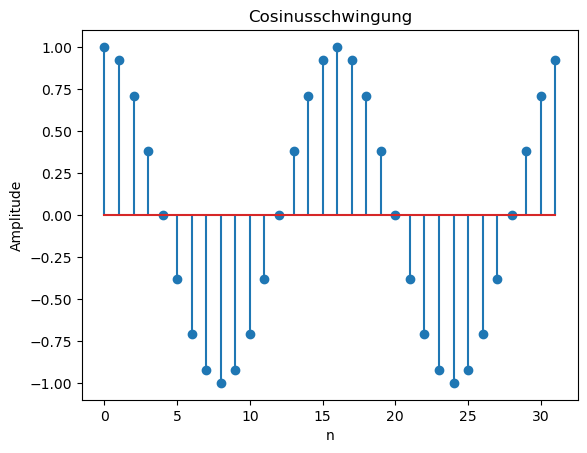

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Parameter der Aufgabenstellung
# n = np.arange(32)
# N = 32
# W_0 = 4 * np.pi / N

# # Berechnung der Cosinus-Schwingung
# function = np.cos(W_0 * n)

# # Darstellung der Cosinus-Schwingung
# plt.stem(n, function)

# plt.xlabel('n')
# plt.ylabel('Amplitude')
# plt.title('Cosinusschwingung')
# plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy import signal
import sounddevice as sd
import time

#Elementarsignale zeitdiskret Funktionen
#Dirac
def sprung(n):
    return np.heaviside(n,1)
#Impuls
def dirac(n):
    return np.array([1 if 0 == i else 0 for i in n])  
#Sinus
def sinus(n,om):
    return np.sin(4*(om/14*n))
#Cosinus
def cosinus(n,om):
    return np.cos(om*(n))


#Darstellung des Signals
def gibGrafikZeit(n, array):
    plt.title("Darstellung im Zeitbereich")
    plt.stem(n,array)
    plt.grid(True)
    print("ACHTUNG Werte von",n[0],"bis",n[n.size-1],"werden Betrachtet!")
    #print("")
    #print("Werte für Y:",array)


def gibGrafikAlles(n,array):
    spectrum = np.fft.fft(array)
    # Bestimmung der Frequenzachse
    sampling_rate = 1 / (n[1] - n[0])  # Abtastrate
    frequencies = np.fft.fftfreq(len(array), 1 / sampling_rate)

    # Darstellung des Spektrums
    plt.stem(frequencies, np.abs(spectrum))  # Amplitudenspektrum
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Amplitude')
    plt.title('Spektrum des Signals')
    plt.grid(True)
    plt.show()



def exponential(n,a):
    #Darstellung
    xa= np.array([a**i if 0<=i else 0.0 for i in n])
    plt.stem(n,xa)
    plt.grid(True)
    print("ACHTUNG Werte von",n[0],"bis",n[n.size-1],"werden Betrachtet!")
    print("Werte für Y:",xa)


Die Phase ist an den relevanten Stellen wo der Betrag einen Peak hat, 0. (Muss sein)
Alle anderen Werte sind quasie Zufallswerte und werden daher nicht berücksichtigt.
die DTFT ist: [2.        +0.j         1.30901699-0.95105652j 0.19098301-0.58778525j
 0.19098301+0.58778525j 1.30901699+0.95105652j 2.        +0.j
 1.30901699-0.95105652j 0.19098301-0.58778525j 0.19098301+0.58778525j
 1.30901699+0.95105652j]


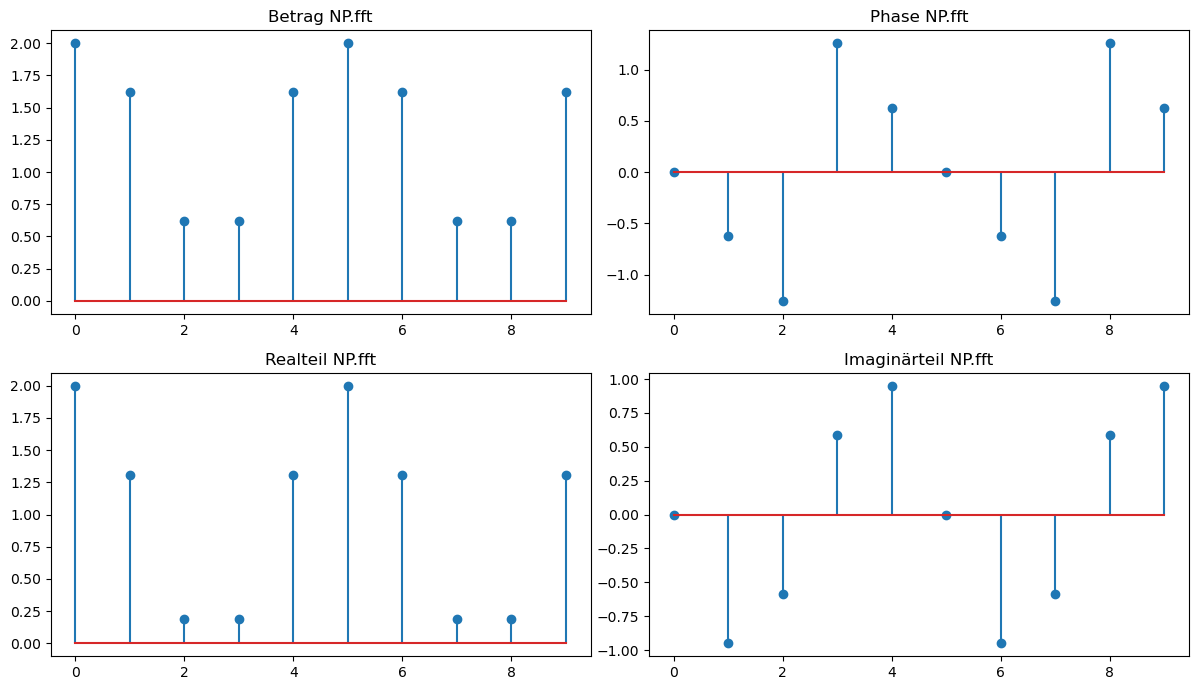

In [17]:
n = np.arange(10)

# Zuweisung der DFT
dft_NP = np.fft.fft(dirac(n)+dirac(n-2))

# Plot der DFTs
fig ,ax = plt.subplots(2, 2, figsize=(12, 7))

# Plot der np.fft.fft Funktion
ax[0][0].set_title('Betrag NP.fft')
ax[0][0].stem(n, np.abs(dft_NP))
ax[0][1].set_title('Phase NP.fft')
ax[0][1].stem(np.angle(dft_NP))
ax[1][0].set_title('Realteil NP.fft')
ax[1][0].stem(np.real(dft_NP))
ax[1][1].set_title('Imaginärteil NP.fft')
ax[1][1].stem(np.imag(dft_NP))

plt.tight_layout()

# Fazit
print("Die Phase ist an den relevanten Stellen wo der Betrag einen Peak hat, 0. (Muss sein)")
print("Alle anderen Werte sind quasie Zufallswerte und werden daher nicht berücksichtigt.")
print("die DTFT ist:", dft_NP)